# **HER2 Status**

# **Import Dataset**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("output.csv")

# **Preprocessing Dataset**

In [3]:
data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [4]:
data.columns

Index([' Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    Study ID                       2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

In [6]:
data.drop(['Patient ID','Sample ID'],axis=1,inplace=True)

In [7]:
data.head()

,Study ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,1.0,Positve,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [8]:
data.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2358.000000,2287.000000,1981.000000,2388.000000,2509.0,2509.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.590755,4.028787,125.244271,108.842487,1.0,6.849746,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.989171,1.189092,76.111772,76.519494,0.0,5.320394,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,1.0,3.922553,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,1.0,6.537589,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,1.0,9.152624,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,81.000000,7.200000,355.200000,384.210000,1.0,104.601416,182.000000,4.000000


In [9]:
data.isnull().sum()

 Study ID                           0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    151
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [10]:
data.shape

(2509, 37)

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

 Study ID                         0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [13]:
data['HER2 Status'].value_counts()

Negative    958
Positive    134
Name: HER2 Status, dtype: int64

In [14]:
data.duplicated().sum()

0

# **Splitting Independent variable and Dependent variable**

In [15]:
x=data.drop('HER2 Status',axis=1)
y=data['HER2 Status']

In [16]:
x.dtypes

 Study ID                          object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         float64
Overall Survival Status           

In [17]:
x.dtypes.value_counts()

object     24
float64    11
int64       1
dtype: int64

In [18]:
y.value_counts()

Negative    958
Positive    134
Name: HER2 Status, dtype: int64

In [19]:
y

1       Negative
4       Negative
5       Negative
10      Negative
11      Negative
          ...   
1697    Negative
1698    Negative
1700    Negative
1702    Negative
1743    Negative
Name: HER2 Status, Length: 1092, dtype: object

# **Label Encoding**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
x=x.apply(LabelEncoder().fit_transform)
y=LabelEncoder().fit_transform(y)

In [22]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
x.dtypes

 Study ID                         int64
Age at Diagnosis                  int64
Type of Breast Surgery            int64
Cancer Type                       int64
Cancer Type Detailed              int64
Cellularity                       int64
Chemotherapy                      int64
Pam50 + Claudin-low subtype       int64
Cohort                            int64
ER status measured by IHC         int64
ER Status                         int64
Neoplasm Histologic Grade         int64
HER2 status measured by SNP6      int64
Tumor Other Histologic Subtype    int64
Hormone Therapy                   int64
Inferred Menopausal State         int64
Integrative Cluster               int64
Primary Tumor Laterality          int64
Lymph nodes examined positive     int64
Mutation Count                    int64
Nottingham prognostic index       int64
Oncotree Code                     int64
Overall Survival (Months)         int64
Overall Survival Status           int64
PR Status                         int64


# **Feature Scale**

In [24]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

# **Splitting Traing and Testing Dataset**

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

# **Classification Model**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# **Logistic Regression**

In [27]:
l1=LogisticRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)
Accuracy_lr=accuracy_score(y_test,y_pred)
Accuracy_lr*100

95.1219512195122

<Axes: >

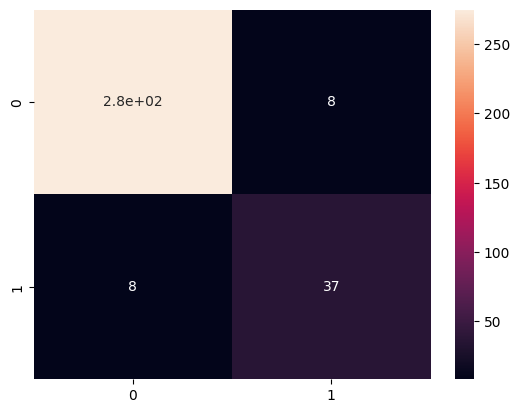

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       283
           1       0.82      0.82      0.82        45

    accuracy                           0.95       328
   macro avg       0.90      0.90      0.90       328
weighted avg       0.95      0.95      0.95       328



# **KNN Classifier**

In [30]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
Accuracy_knn=accuracy_score(y_test,knn_pred)
Accuracy_knn*100

94.20731707317073

<Axes: >

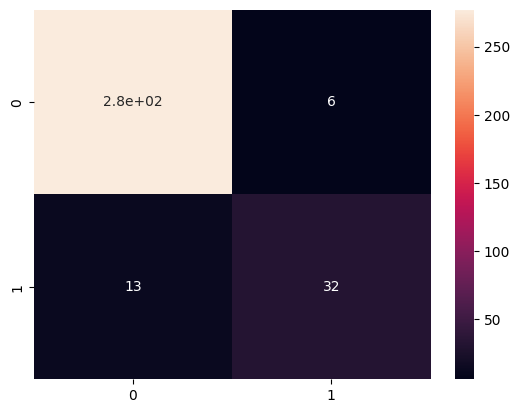

In [31]:
cm = confusion_matrix(y_test, knn_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       283
           1       0.84      0.71      0.77        45

    accuracy                           0.94       328
   macro avg       0.90      0.84      0.87       328
weighted avg       0.94      0.94      0.94       328



# **Random Forest classifier**

In [33]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
Accuracy_rf=accuracy_score(y_test,rfc_pred)
Accuracy_rf*100

95.73170731707317

<Axes: >

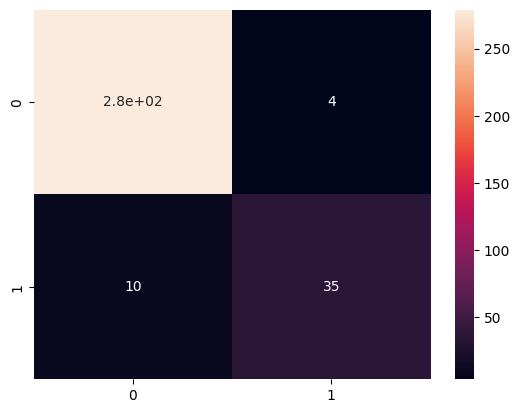

In [34]:
cm = confusion_matrix(y_test,rfc_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       283
           1       0.90      0.78      0.83        45

    accuracy                           0.96       328
   macro avg       0.93      0.88      0.90       328
weighted avg       0.96      0.96      0.96       328



# **ROC curve**

In [36]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, rfc_pred, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# **AUC score**

In [37]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, rfc_pred)
print(auc_score1)

0.8818217510797016


<ipython-input-38-e312ac147ba0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


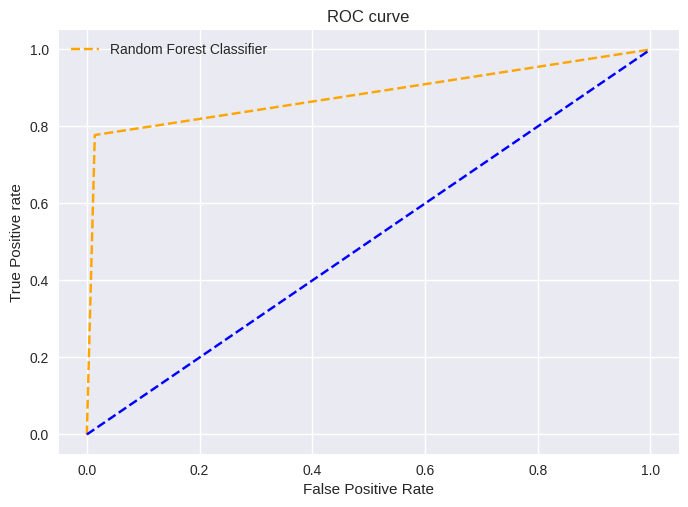

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **Decision Tree Classifier**

In [39]:
dt=DecisionTreeClassifier(criterion = "entropy",random_state=20)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
Accuracy_dt=accuracy_score(y_test,dt_pred)
Accuracy_dt*100

94.51219512195121

<Axes: >

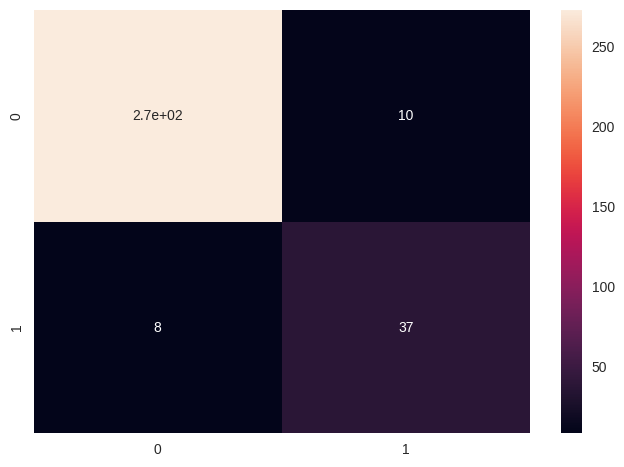

In [40]:
cm = confusion_matrix(y_test, dt_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       283
           1       0.79      0.82      0.80        45

    accuracy                           0.95       328
   macro avg       0.88      0.89      0.89       328
weighted avg       0.95      0.95      0.95       328



# **Support Vector Machine**

In [42]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
Accuracy_svm=accuracy_score(y_test,svm_pred)
Accuracy_svm*100

86.28048780487805

<Axes: >

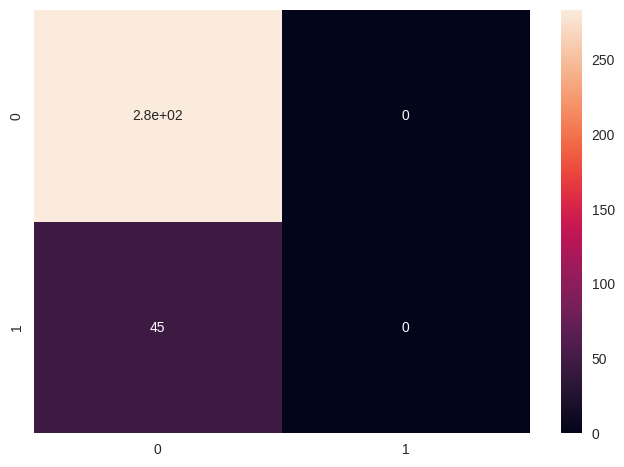

In [43]:
cm = confusion_matrix(y_test,svm_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       283
           1       0.00      0.00      0.00        45

    accuracy                           0.86       328
   macro avg       0.43      0.50      0.46       328
weighted avg       0.74      0.86      0.80       328



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Naive Bayes**

In [45]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
Accuracy_nb=accuracy_score(y_test,gnb_pred)
Accuracy_nb*100

91.46341463414635

<Axes: >

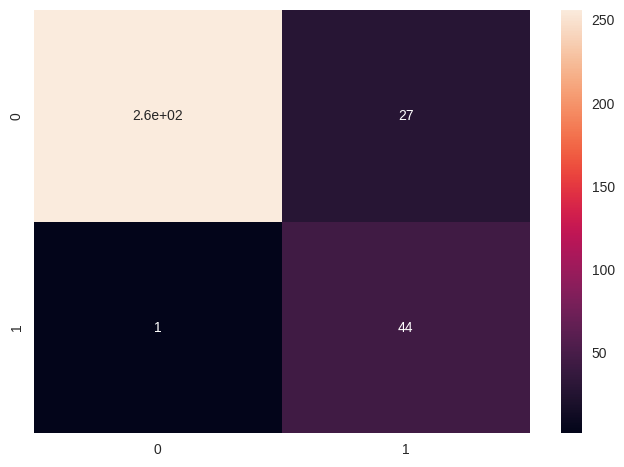

In [46]:
cm = confusion_matrix(y_test,gnb_pred)
#print(cm)
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       283
           1       0.62      0.98      0.76        45

    accuracy                           0.91       328
   macro avg       0.81      0.94      0.85       328
weighted avg       0.94      0.91      0.92       328



# **Accuracy Result**

In [48]:
Accuracy={"Logistic_Regression_Classifier":Accuracy_lr,"KNN_Classifier":Accuracy_knn,"Random_Forest_Classifier":Accuracy_rf,"Descion_Tree":Accuracy_dt,"Support_Vector_Machine":Accuracy_svm,"Naive_Bayes":Accuracy_nb}

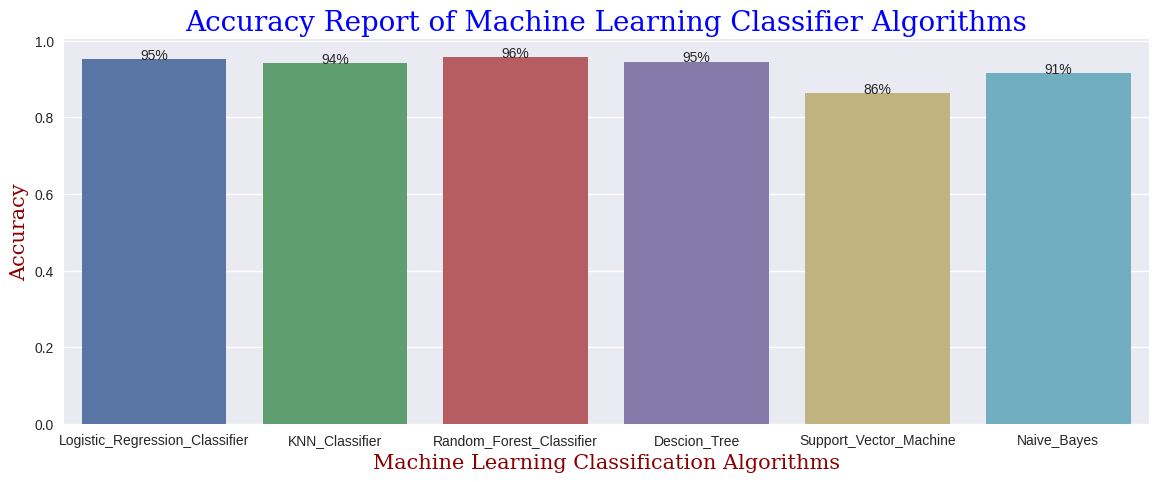

In [49]:
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(14, 5))
a=sns.barplot(x=list(Accuracy.keys()),y=list(Accuracy.values()))
for i,v in enumerate(list(Accuracy.values())):
  a.text(i,v+0.0,f'{v:.0%}',ha='center')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Machine Learning Classification Algorithms",fontdict = font2)
plt.ylabel("Accuracy",fontdict = font2)
plt.title("Accuracy Report of Machine Learning Classifier Algorithms",fontdict = font1)
plt.show()